In [1]:
import os
import sys

# Get the absolute path of the project root 
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Adding project root in syspath
sys.path.append(project_root)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# custom function
from src.utils import reduce_mem_usage


In [2]:
wi_df = pd.read_csv('../../data/interim/wi_sales.csv')

In [3]:
wi_df.shape

(14132115, 4)

In [4]:
wi_df.head()

,date,item_id,store_id,total_sales
0,2011-01-29,HOBBIES_1_001,WI_1,0.000000
1,2011-01-29,HOBBIES_1_002,WI_1,0.000000
2,2011-01-29,HOBBIES_1_003,WI_1,0.000000
3,2011-01-29,HOBBIES_1_004,WI_1,8.679688
4,2011-01-29,HOBBIES_1_005,WI_1,0.000000


In [5]:
wi_df.describe()

,total_sales
count,1.413212e+07
mean,2.628760e+00
std,7.941850e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.980469e+00
max,6.424414e+02


In [6]:
grouped_data = wi_df.groupby(['date', 'store_id','item_id']).agg({
    'total_sales':'sum'
}).reset_index()

In [7]:
grouped_data.head()

,date,store_id,item_id,total_sales
0,2011-01-29,WI_1,FOODS_1_001,0.000000
1,2011-01-29,WI_1,FOODS_1_002,0.000000
2,2011-01-29,WI_1,FOODS_1_003,11.523438
3,2011-01-29,WI_1,FOODS_1_004,0.000000
4,2011-01-29,WI_1,FOODS_1_005,8.818359


In [8]:
grouped_data.shape

(14095527, 4)

In [9]:
# extract yr, month, day, week and weekday information from the date attribute
grouped_data['date'] = pd.to_datetime(grouped_data['date'])

In [10]:
# Extracting year from the data
grouped_data['year'] = grouped_data['date'].dt.year


In [11]:
# Extract month from the data

grouped_data['month'] = grouped_data['date'].dt.month


In [12]:
# Extract day of the month 

grouped_data['day'] = grouped_data['date'].dt.day

In [13]:
# Extract week 
# grouped_data['day'] = grouped_data['date'].dt.week

In [14]:
# Extract week day 

grouped_data['weekday'] = grouped_data['date'].dt.weekday

In [15]:
grouped_data.head()

,date,store_id,item_id,total_sales,year,month,day,weekday
0,2011-01-29,WI_1,FOODS_1_001,0.000000,2011,1,29,5
1,2011-01-29,WI_1,FOODS_1_002,0.000000,2011,1,29,5
2,2011-01-29,WI_1,FOODS_1_003,11.523438,2011,1,29,5
3,2011-01-29,WI_1,FOODS_1_004,0.000000,2011,1,29,5
4,2011-01-29,WI_1,FOODS_1_005,8.818359,2011,1,29,5


In [16]:
grouped_data['state']=grouped_data['store_id'].apply(lambda x: x.split('_')[0])
grouped_data['store_num']=grouped_data['store_id'].apply(lambda x: int(x.split('_')[1]))

In [17]:
grouped_data['department'] = grouped_data['item_id'].apply(lambda x: int(x.split('_')[1]))
grouped_data['category'] = grouped_data['item_id'].apply(lambda x: x.split('_')[0])
grouped_data['item'] = grouped_data['item_id'].apply(lambda x: int(x.split('_')[-1]))


In [18]:
grouped_data.head()

,date,store_id,item_id,total_sales,year,month,day,weekday,state,store_num,department,category,item
0,2011-01-29,WI_1,FOODS_1_001,0.000000,2011,1,29,5,WI,1,1,FOODS,1
1,2011-01-29,WI_1,FOODS_1_002,0.000000,2011,1,29,5,WI,1,1,FOODS,2
2,2011-01-29,WI_1,FOODS_1_003,11.523438,2011,1,29,5,WI,1,1,FOODS,3
3,2011-01-29,WI_1,FOODS_1_004,0.000000,2011,1,29,5,WI,1,1,FOODS,4
4,2011-01-29,WI_1,FOODS_1_005,8.818359,2011,1,29,5,WI,1,1,FOODS,5


In [19]:
grouped_data['category'].unique()

array(['FOODS', 'HOBBIES', 'HOUSEHOLD'], dtype=object)

In [20]:
state_encoding = {
    'WI' : 0
}

category_encoding = {
    'FOODS': 0,
    'HOBBIES': 1,
    'HOUSEHOLD':2
}



In [21]:
grouped_data['state'] = grouped_data['state'].apply(lambda x:  state_encoding[x])
grouped_data['category'] = grouped_data['category'].apply(lambda x:  category_encoding[x])


In [22]:
grouped_data.head()

,date,store_id,item_id,total_sales,year,month,day,weekday,state,store_num,department,category,item
0,2011-01-29,WI_1,FOODS_1_001,0.000000,2011,1,29,5,0,1,1,0,1
1,2011-01-29,WI_1,FOODS_1_002,0.000000,2011,1,29,5,0,1,1,0,2
2,2011-01-29,WI_1,FOODS_1_003,11.523438,2011,1,29,5,0,1,1,0,3
3,2011-01-29,WI_1,FOODS_1_004,0.000000,2011,1,29,5,0,1,1,0,4
4,2011-01-29,WI_1,FOODS_1_005,8.818359,2011,1,29,5,0,1,1,0,5


In [23]:
selected_features = ['month', 'weekday', 'state', 'store_num', 'category', 'department', 'item']
target = ['total_sales']

In [24]:
# train test split for the data

train_cutoff_date = '2014-12-01'

train = grouped_data[grouped_data['date']< train_cutoff_date]

test = grouped_data[grouped_data['date']>= train_cutoff_date]


X_train = train[selected_features]
y_train = train['total_sales']
X_test = test[selected_features]
y_test = test['total_sales']

In [25]:
del grouped_data

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg = LinearRegression().fit(X_train,y_train)

In [27]:
y_pred = reg.predict(X_test)

In [28]:

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.084057773732277
Mean Squared Error (MSE): 81.34968461046714
R-squared (R²): 0.0010091830326435236


In [29]:
from sklearn.ensemble import RandomForestRegressor

# randomForest = RandomForestRegressor(n_estimators=10, random_state=42)

# randomForest.fit(X_train, y_train)

In [30]:
!pip install lightgbm


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import lightgbm as lgb

# model = lgb.LGBRegressor(n_estimator=100, learning_rate=0.1, random_state=42)

In [32]:

# Prepare the dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Train the model
model = lgb.train(params={'objective': 'regression', 'learning_rate': 0.1}, 
                  train_set=train_data, num_boost_round=100)

# Prediction
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 12824094, number of used features: 6
[LightGBM] [Info] Start training from score 2.566343


In [33]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.899631654039067
Mean Squared Error (MSE): 73.82209012481687
R-squared (R²): 0.09344958770080303


In [34]:

# Train a LightGBM model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'boosting_type': 'gbdt'
}

model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 12824094, number of used features: 6
[LightGBM] [Info] Start training from score 2.566343


In [35]:
# Get feature names
feature_names = X_train.columns

# Get feature importance (split importance by default)
importance_values = model.feature_importance(importance_type='split')

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [36]:
importance_df.head()

,Feature,Importance
6,item,1761
3,store_num,417
5,department,288
4,category,263
0,month,168


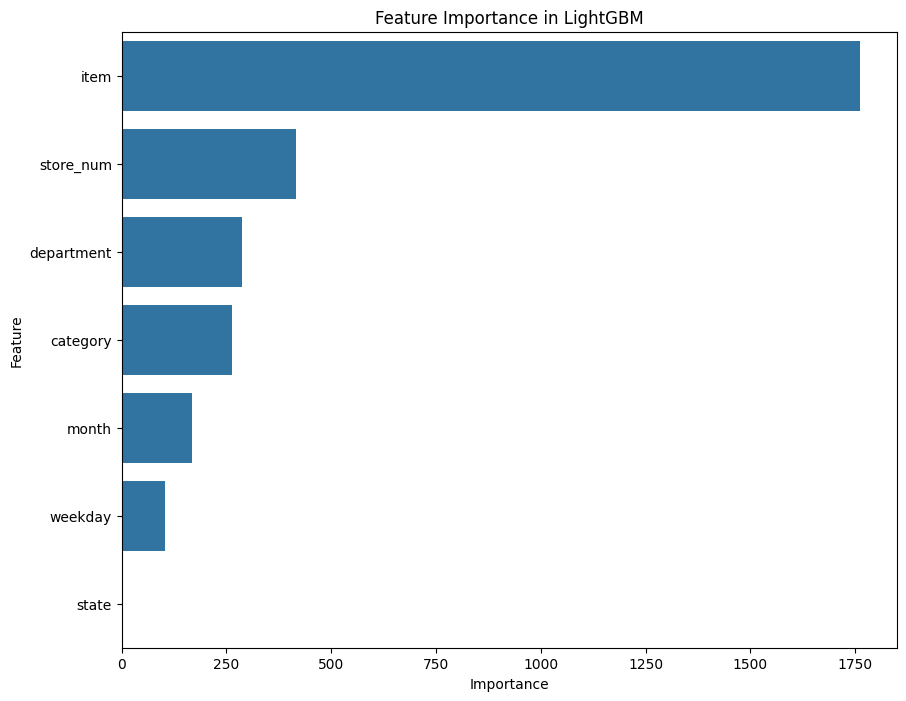

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in LightGBM')
plt.show()

In [38]:
import pickle
with open('../../models/predictive/lgbm_model.pkl','wb') as file:
    pickle.dump(model, file)